In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sns
import cv2
from skimage import feature

In [2]:
import matplotlib.pyplot as plt

In [5]:
%%time
train_img = []
train_img.append(cv2.resize(cv2.imread('train/becks/1001.jpg', cv2.IMREAD_GRAYSCALE), (200, 200), interpolation = cv2.INTER_AREA))
H = [feature.hog(img,  orientations=5, pixels_per_cell=(25, 25),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2") for img in train_img]

Wall time: 111 ms


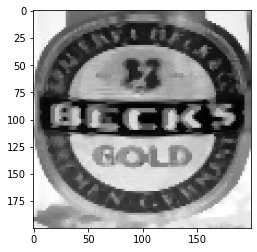

In [6]:
plt.gray()
plt.imshow(train_img[0])

In [7]:
H[0].shape

(980,)

0
100
Wall time: 2min 20s


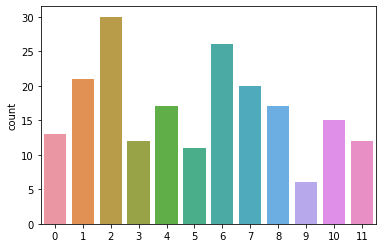

In [8]:
%%time
train_df = pd.read_csv('train.csv')
train_img = []
label = []
count = 0
for index, row in train_df.iterrows():
    train_img.append(cv2.resize(cv2.imread(row.img, cv2.IMREAD_GRAYSCALE), (200, 200), interpolation = cv2.INTER_AREA))
    H = [feature.hog(img,  orientations=5, pixels_per_cell=(25, 25),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2") for img in train_img]
    label.append(row.label)
    if count%100 == 0:
        print(count)
    count+=1
    if count == 200: break
sns.countplot(label)

In [ ]:
test_df = pd.read_csv('test.csv')
test_img = []
test_label = []
count = 0
for index, row in test_df.iterrows():
    test_img.append(cv2.resize(cv2.imread(row.img, cv2.IMREAD_GRAYSCALE), (200, 200), interpolation = cv2.INTER_AREA))
    H_test = [feature.hog(img,  orientations=5, pixels_per_cell=(25, 25),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2") for img in test_img]
    test_label.append(row.label)
    if count%100 == 0:
        print(count)
    count+=1
    if count == 100: break
sns.countplot(test_label)

0


In [ ]:
%%time
model = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
model.fit(H, label)

In [11]:
%%time
y_predict = model.predict(H_test)
print(classification_report(test_label, y_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.91      0.95        11
           2       0.88      0.78      0.82         9
           3       0.50      1.00      0.67         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         5
           7       1.00      0.67      0.80         6
           9       1.00      1.00      1.00         1
          10       0.71      1.00      0.83         5
          11       1.00      0.75      0.86         4

    accuracy                           0.88        50
   macro avg       0.89      0.92      0.89        50
weighted avg       0.91      0.88      0.88        50

Wall time: 26.1 ms


In [12]:
pd.crosstab(pd.Series(test_label, name='True'), pd.Series(y_predict, name='Predict'))

Predict,0,1,2,3,4,5,6,7,9,10,11
True,,,,,,,,,,,
0,3,0,0,0,0,0,0,0,0,0,0
1,0,10,0,0,0,0,0,0,0,1,0
2,0,0,7,1,0,0,0,0,0,1,0
3,0,0,0,2,0,0,0,0,0,0,0
4,0,0,0,0,3,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,5,0,0,0,0
7,1,0,0,1,0,0,0,4,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0
